# MKA-MLF, Lab_08 - RNN

Recurrent Neural Networks, are a class of artificial neural networks designed to recognize patterns in sequences of data, such as text, genomes, handwriting, or spoken words. Unlike traditional neural networks, which assume all inputs (and outputs) are independent of each other, RNNs are designed to recognize sequential or temporal patterns, making them especially suited for tasks like language modeling, speech recognition, and time series prediction.

## Exercise 1 - Time Series Forecasting

### 1.0 Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten, SimpleRNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

### 1.1 Generating dataset

In [2]:
def generate_time_series(batch_size, n_steps):
  freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
  time = np.linspace(0,1,n_steps)

  series = 0.5 * np.sin((time - offsets1) * (freq1*10 + 10))
  series += 0.2 * np.sin((time - offsets2) * (freq2*20 + 20))
  series += 0.1 * (np.random.rand(batch_size, n_steps)- 0.5)
  return series[..., np.newaxis].astype(np.float32)

In [3]:
data_size = 10000
n_steps = 50
np.random.seed(0)

series = generate_time_series(data_size, n_steps + 1)

### 1.2 Train/Valid/Test split

In [4]:
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [5]:
no_training_epochs = 5

### 1.3 Data examination

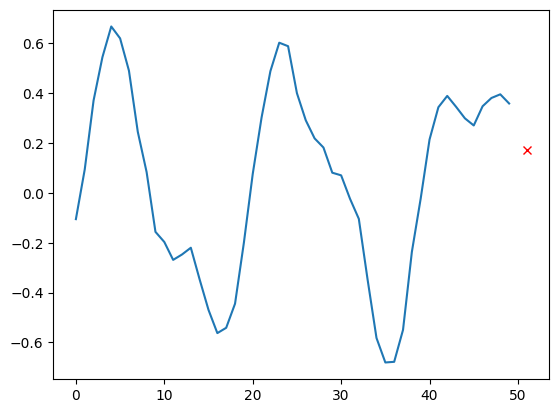

In [6]:
plt.figure()
plt.plot(X_train[0])
plt.plot(n_steps+1, y_train[0], 'rx')

### 1.4 Simple Linear model

In [7]:
# Model definition
model_linear = Sequential()
model_linear.add(Flatten(input_shape=(50,1)))
model_linear.add(Dense(1, activation = None))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
# Model building

learning_rate = 0.001
optimizer = Adam(learning_rate)
model_linear.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_squared_error'])

In [9]:
model_linear.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51 (204.00 B)

 Trainable params: 51 (204.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Model training

history_linear = model_linear.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.2468 - mean_squared_error: 0.2468 - val_loss: 0.0519 - val_mean_squared_error: 0.0519
Epoch 2/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0444 - mean_squared_error: 0.0444 - val_loss: 0.0268 - val_mean_squared_error: 0.0268
Epoch 3/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0241 - mean_squared_error: 0.0241 - val_loss: 0.0169 - val_mean_squared_error: 0.0169
Epoch 4/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0163 - mean_squared_error: 0.0163 - val_loss: 0.0127 - val_mean_squared_error: 0.0127
Epoch 5/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0128 - mean_squared_error: 0.0128 - val_loss: 0.0106 - val_mean_squared_error: 0.0106


In [11]:
def plot_function(history):
  plt.figure()

  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='validation_loss')
  plt.legend()
  plt.grid()
  plt.xlim([0,no_training_epochs-1])
  plt.xlabel('epochs')

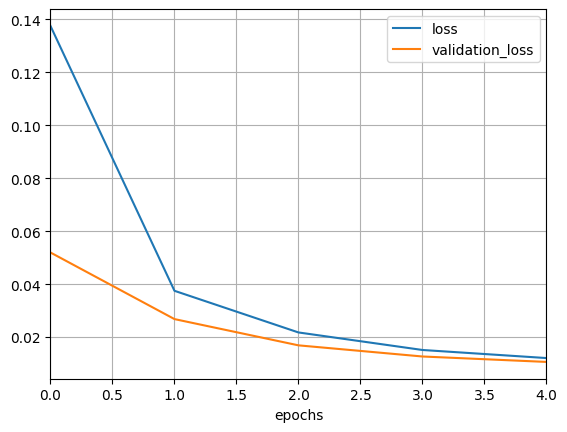

In [12]:
plot_function(history_linear)

In [13]:
score = model_linear.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test MSE: ', score[1])

Test loss: 0.010979841463267803
Test MSE:  0.010979841463267803


### 1.5 Simple RNN Model

In [14]:
model_simple_rnn = Sequential()
model_simple_rnn.add(SimpleRNN(1, input_shape=[50, 1]))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
learning_rate_simple_rnn = 0.001
optimizer_simple_rnn = Adam(learning_rate_simple_rnn)
model_simple_rnn.compile(loss='mean_squared_error', optimizer=optimizer_simple_rnn, metrics=['mean_squared_error'])

In [16]:
history_simple_rnn = model_simple_rnn.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.1572 - mean_squared_error: 0.1572 - val_loss: 0.1452 - val_mean_squared_error: 0.1452
Epoch 2/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1390 - mean_squared_error: 0.1390 - val_loss: 0.1392 - val_mean_squared_error: 0.1392
Epoch 3/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1392 - mean_squared_error: 0.1392 - val_loss: 0.1424 - val_mean_squared_error: 0.1424
Epoch 4/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1381 - mean_squared_error: 0.1381 - val_loss: 0.1383 - val_mean_squared_error: 0.1383
Epoch 5/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1348 - mean_squared_error: 0.1348 - val_loss: 0.1396 - val_mean_squared_error: 0.1396


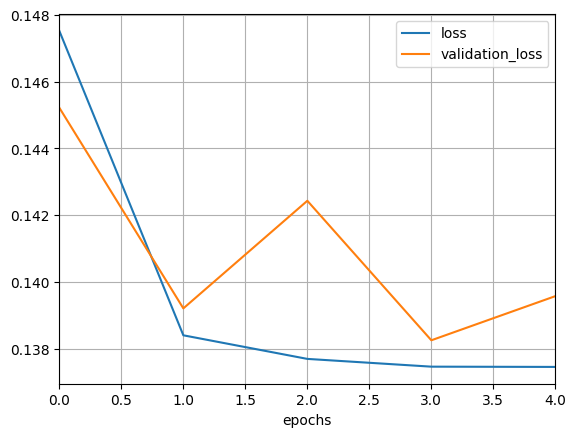

In [17]:
plot_function(history_simple_rnn)

### 1.5 Deep RNN Model

In [18]:
model_deep_rnn = Sequential()
model_deep_rnn.add(SimpleRNN(20, return_sequences = True, input_shape=[50, 1]))
model_deep_rnn.add(SimpleRNN(20, return_sequences = True))
model_deep_rnn.add(SimpleRNN(1, input_shape=[50, 1]))

In [19]:
learning_rate_deep_rnn = 0.001
optimizer_deep_rnn = Adam(learning_rate_deep_rnn)
model_deep_rnn.compile(loss='mean_squared_error', optimizer=optimizer_deep_rnn, metrics=['mean_squared_error'])

In [20]:
history_deep_rnn = model_deep_rnn.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - loss: 0.0308 - mean_squared_error: 0.0308 - val_loss: 0.0050 - val_mean_squared_error: 0.0050
Epoch 2/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.0040 - val_mean_squared_error: 0.0040
Epoch 3/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0036 - val_mean_squared_error: 0.0036
Epoch 4/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 5/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0034 - val_mean_squared_error: 0.0034


In [21]:
score = model_deep_rnn.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test MSE: ', score[1])

Test loss: 0.003635294269770384
Test MSE:  0.003635294269770384


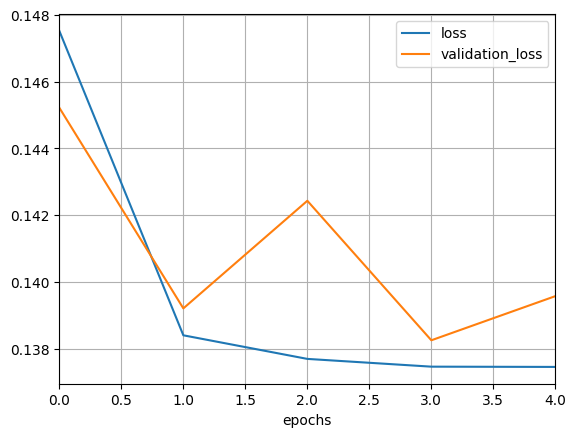

In [22]:
plot_function(history_simple_rnn)

## Exercise 2 - The movie review




Based on the written rewiev, classify if the movie if good or bad

### 2.0 - Import libraries

In [1]:
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, SimpleRNN, GRU, Dropout
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

from keras.preprocessing.sequence import pad_sequences
#from keras.preprocessing.text import Tokenizer

#includes for using vscode
#from tensorflow.keras.preprocessing.text import Tokenizer
#from tensorflow.keras.preprocessing.sequence import pad_sequences


### 2.1 - Load dataset

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.imdb.load_data()

### 2.2 - Dataset examination

In [3]:
word_index = keras.datasets.imdb.get_word_index()
id_to_word = {id_ + 3:word for word, id_ in word_index.items()}
for id_, token in enumerate(("<pad>", "<sos>", "<unk>")):
  id_to_word[id_] = token

In [4]:
single_sequence = " ".join([id_to_word[id_] for id_ in X_train[0][:]])

In [5]:
single_sequence

"<sos> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and shou

In [6]:
max_length = 150  # Define the maximum length of a review
X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_length, padding='post', truncating='post', value=0)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_length, padding='post', truncating='post', value=0)

In [7]:


embed_size = 128
vocabulary_size = 1000

"""
model = keras.models.Sequential([
    keras.layers.Embedding(vocabulary_size, embed_size, input_shape=[None]),
    keras.layers.LSTM(128, return_sequences=True),
    keras.layers.LSTM(128),
    keras.layers.Dense(1, activation='sigmoid')
])
"""
model = keras.models.Sequential([
    keras.layers.Embedding(vocabulary_size, embed_size, input_shape=[None]),

    # LSTM with lighter L2 regularization and Dropout
    keras.layers.LSTM(128, return_sequences=True, kernel_regularizer=l2(0.0001)),
    Dropout(0.2),

    keras.layers.LSTM(128, kernel_regularizer=l2(0.0001)),
    Dropout(0.2),

    keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=l2(0.0001))
])



model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()





/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, None, 128)           │         128,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, None, 128)           │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, None, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 391,297 (1.49 MB)

 Trainable params: 391,297 (1.49 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
optimizer = Adam(learning_rate = 0.001)

In [9]:
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [10]:
history = model.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.5198 - loss: 0.7043 - val_accuracy: 0.5062 - val_loss: 0.7008
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.5086 - loss: 0.7009 - val_accuracy: 0.4938 - val_loss: 0.7013
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - accuracy: 0.5468 - loss: 0.6877 - val_accuracy: 0.5168 - val_loss: 0.7072
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.6043 - loss: 0.6491 - val_accuracy: 0.7878 - val_loss: 0.4730
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.8127 - loss: 0.4303 - val_accuracy: 0.8074 - val_loss: 0.4316


In [11]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: ', score[1]*100, "%")

Test loss: 0.4195306599140167
Test accuracy:  81.34400248527527 %


TASK: Modify structure, change the core of the network from RNN to LTSM and GRU. Compare the results

With the initial network, we got around 50% accuracy.
Changing the model to LTSM with the same structure resulted in 82.8% accuracy.
Adding L2 regularization and Dropout gained similar results